**1. Hierarchical Cluster Analysis**

Hierarchical Cluster Analysis is a clustering technique that groups similar data points into clusters using a tree-like structure called a dendrogram. In other words, this involves creating a hierarchy of nested clusters through a series of merges or splits of the data points. It does not require the user to specify the number of clusters in advance, and can be used to explore the structure of the data at different levels of granularity.

In this lab, we will first create a hypothetical dataset and then normalise the data to range between zero and one. Next, we will perform hierarchical clustering using the linkage() function with the ward method, which minimises the variance of the clusters being merged. The resulting linkage matrix L will be used to create the dendrogram using the dendrogram() function. Finally, we will display the dendrogram using matplotlib. The resulting dendrogram will show the hierarchy of the clusters and the distances between them.

Steps:
1. Import/install the necessary packages.
2. Create a hypothetical dataset.
3. Normalise the data to range between 0 and 1. 
4. Compute the pairwise distances between observations using the Euclidean distance.
5. Perform hierarchical clustering.
6. Display the dendrogram.
7. Cluster the assignments.
8. Display the dendrogram according to the number of clusters based on distance cut.

**Import/install the necessary packages**

In [1]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

**Create a hypothetical dataset**

In [2]:
data = {
    'x1': [5, 7, 9, 3, 1, 6, 5, 3, 8, 7, 2, 4],
    'x2': [10, 9, 6, 3, 2, 1, 8, 5, 2, 4, 9, 7] 
}
df = pd.DataFrame(data)

**Normalise the data to range between 0 and 1**

In [3]:
scaler = MinMaxScaler() # Create a MinMaxScaler object
normalized_data = scaler.fit_transform(df) # Fit the scaler to the data and transform the data
normalized_df = pd.DataFrame(normalized_data, columns=df.columns) # Convert the normalized data back to a DataFrame
normalized_df.head(3)

,x1,x2
0,0.50,1.000000
1,0.75,0.888889
2,1.00,0.555556


**Compute the pairwise distances between observations** (use the Euclidean distance)

In [4]:
distances = pdist(normalized_df, metric='euclidean')

**Perform hierarchical clustering** (use linkage() function)

In [5]:
L = linkage(distances, method='ward') # L is the linkage matrix; note you also use directly metric='euclidean' in linkage function

**Display the dendrogram**

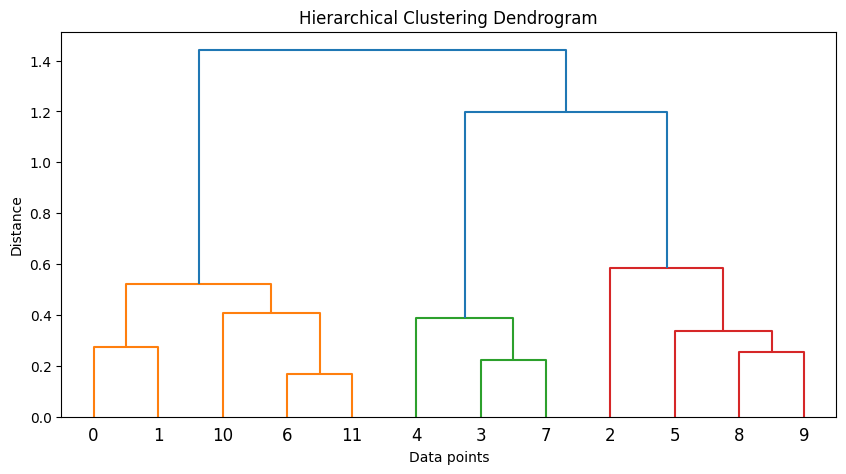

In [6]:
plt.figure(figsize=(10, 5))
dendrogram(L)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.show()

**Cluster the assignments**

In [7]:
n_clusters = 3 # Assign observations to clusters
clusters = fcluster(L, t=n_clusters, criterion='maxclust')
print(clusters)

[1 1 3 2 2 3 1 2 3 3 1 1]


**Display the dendrogram according to the number of clusters based on distance cut**

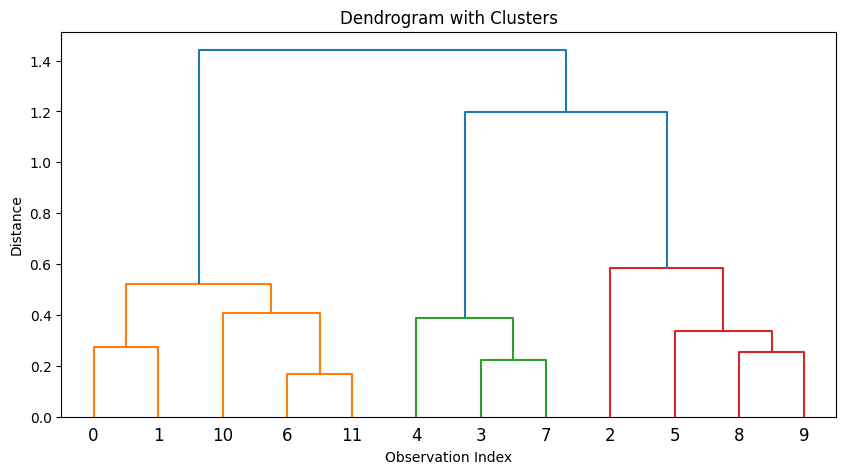

In [8]:
plt.figure(figsize=(10, 5))
dendrogram(L, color_threshold=1, labels=df.index)
plt.title('Dendrogram with Clusters')
plt.xlabel('Observation Index')
plt.ylabel('Distance')
plt.show()

**Excercise 1:**

1.1 Use the following data and find the number of clusters.

In [9]:
data = {
    'z1': [5, 7, 9, 3, 1, 6, 5, 3, 8, 7, 2, 4],
    'z2': [10, 9, 6, 3, 2, 1, 8, 5, 2, 4, 9, 7],
    'z3': [8, 8, 4, 4, 3, 2, 7, 4, 3, 6, 9, 8]
}

1.2 Change the color_threshold to 0.2, 0.4, 0.5, 1.2, and 2; and observe the changes in the dendrogram.

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [62.5, 62.5, 93.75, 93.75],
  [21.25, 21.25, 78.125, 78.125]],
 'dcoord': [[0.0, 0.2735793833832251, 0.2735793833832251, 0.0],
  [0.0, 0.16724436914989302, 0.16724436914989302, 0.0],
  [0.0, 0.40895644067598497, 0.40895644067598497, 0.16724436914989302],
  [0.2735793833832251,
   0.5204164998665333,
   0.5204164998665333,
   0.40895644067598497],
  [0.0, 0.22222222222222227, 0.22222222222222227, 0.0],
  [0.0, 0.38623432619655945, 0.38623432619655945, 0.22222222222222227],
  [0.0, 0.25496610764841415, 0.25496610764841415, 0.0],
  [0.0, 0.3357359399873313, 0.3357359399873313, 0.25496610764841415],
  [0.0, 0.5854239433228179, 0.5854239433228179, 0.3357359399873313],
  [0.38623432619655945,
   1.1959738578028838,
   1.195973

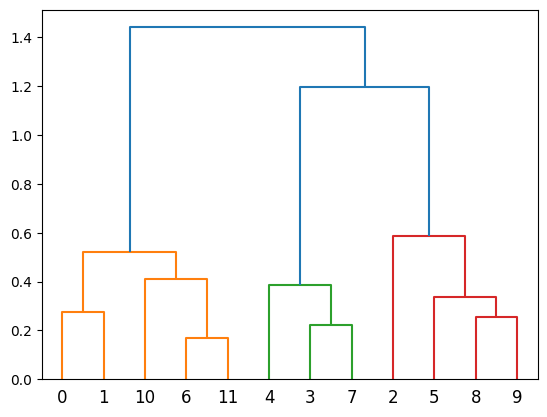

In [10]:
dendrogram(L, color_threshold=1, labels=df.index) 

**2. K-means Cluster Analysis**

K-means clustering is one of the well-known machine learning algorithms that partitions a dataset into K distinct, non-overlapping clusters based on the attributes of the given data points. The algorithm iteratively assigns each data point to the nearest cluster centroid and then recomputes the centroids based on the mean of the data points in the cluster. The objective of the algorithm is to minimise the sum of the squared distances between each data point and its assigned centroid.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   x1       12 non-null     int64
 1   x2       12 non-null     int64
 2   cluster  12 non-null     int32
dtypes: int32(1), int64(2)
memory usage: 368.0 bytes
None 

   x1  x2  cluster
0   5  10        0
1   7   9        0
2   9   6        1
3   3   3        2
4   1   2        2 

               x1        x2
cluster                    
0        4.600000  8.600000
1        7.500000  3.250000
2        2.333333  3.333333
           x1                                                   x2            \
        count      mean       std  min   25%  50%   75%  max count      mean   
cluster                                                                        
0         5.0  4.600000  1.816590  2.0  4.00  5.0  5.00  7.0   5.0  8.600000   
1         4.0  7.500000  1.290994  6.0  6.75  7.5  8.25  9.0   4.0  3.250000   
2 

<ipython-input-11-2f9725fa6a70>:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('cluster')['x1','x2'].plot.box(vert=False)


cluster
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
2    Axes(0.125,0.11;0.775x0.77)
dtype: object

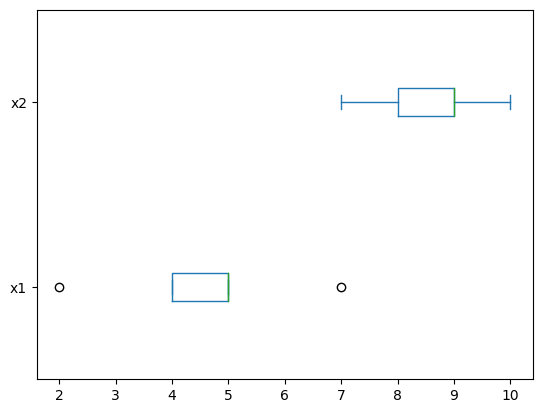

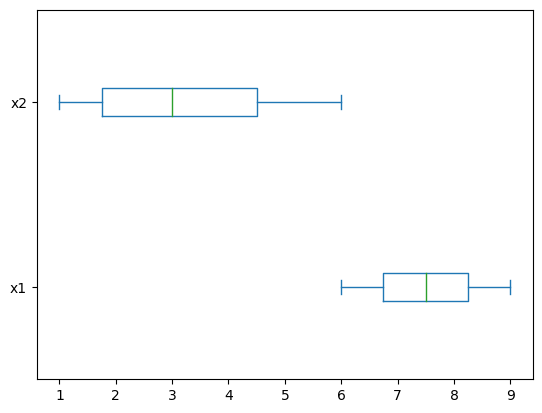

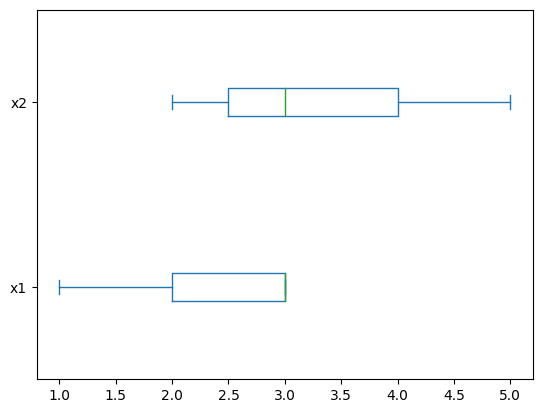

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(normalized_df) # fit k-means object to data
labels = kmeans.labels_ # get cluster assignments for each data point
df['cluster'] = labels # add cluster labels to dataframe
print(df.info(),'\n')
print(df.head(),'\n')
print(df.groupby('cluster').mean())
print(df.groupby('cluster').describe())
df.groupby('cluster')['x1','x2'].plot.box(vert=False)